# Eksperimen data playtennis

Ini supaya gw bisa ngerti ngapain sih ni jupyter notebook

Biasa aja ternyata

padahal di websitenya kok bisa keren ya

In [1]:
from sklearn import datasets
from sklearn.model_selection import cross_val_score
import pandas

playtennis_raw = pandas.read_csv("experiment-scikit/playtennis.csv")
playtennis = pandas.DataFrame(playtennis_raw)
print(playtennis)

     outlook temperature humidity    wind playtennis
0      sunny         hot     high    weak         no
1      sunny         hot     high  strong         no
2   overcast         hot     high    weak        yes
3       rain        mild     high    weak        yes
4       rain        cool   normal    weak        yes
5       rain        cool   normal  strong         no
6   overcast        cool   normal  strong        yes
7      sunny        mild     high    weak         no
8      sunny        cool   normal    weak        yes
9       rain        mild   normal    weak        yes
10     sunny        mild   normal  strong        yes
11  overcast        mild     high  strong        yes
12  overcast         hot   normal    weak        yes
13      rain        mild     high  strong         no


In [2]:
playtennis_train.columns

NameError: name 'playtennis_train' is not defined

In [3]:
playtennis_train = playtennis.drop("playtennis", axis=1)
playtennis_classes = playtennis.iloc[:,-1]

In [4]:
from sklearn import preprocessing
for col in playtennis_train.columns:
    encoder = preprocessing.LabelEncoder()
    playtennis_train[col] = encoder.fit_transform(playtennis_train[col])
encoder = preprocessing.LabelEncoder()
playtennis_classes = encoder.fit_transform(playtennis_classes)

In [5]:
encoder.classes_

array(['no', 'yes'], dtype=object)

In [6]:
from sklearn import tree
dtl = tree.DecisionTreeClassifier()
dtl.fit(playtennis_train, playtennis_classes)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [7]:
from sklearn.neural_network import MLPClassifier
ann = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(5, 2), random_state=1)
ann.fit(playtennis_train, playtennis_classes)

MLPClassifier(activation='relu', alpha=1e-05, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(5, 2), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=1, shuffle=True,
       solver='lbfgs', tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=False)

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(playtennis_train, playtennis_classes, test_size=0.20, random_state=42)

In [9]:
from sklearn.metrics import accuracy_score
split = tree.DecisionTreeClassifier()
split = split.fit(X_train, y_train)
y_predict = split.predict(X_test)
accuracy = accuracy_score(y_test, y_predict)
print('Akurasi: {} %'.format(accuracy * 100))

Akurasi: 100.0 %


In [13]:
%matplotlib inline
import matplotlib.pyplot as plt
import itertools
import numpy as np
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [14]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_predict, target_names=encoder.classes_))

             precision    recall  f1-score   support

         no       1.00      1.00      1.00         1
        yes       1.00      1.00      1.00         2

avg / total       1.00      1.00      1.00         3



Confusion matrix, without normalization
[[1 0]
 [0 2]]


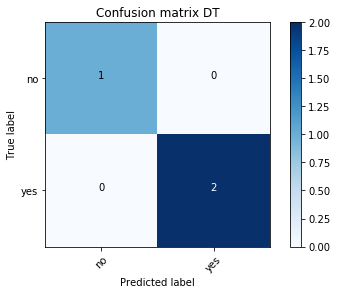

In [15]:
from sklearn.metrics import confusion_matrix
cnf_matrix = confusion_matrix(y_test, y_predict)
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=encoder.classes_,
                      title='Confusion matrix DT')

In [16]:
ann_split = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(5, 2), random_state=1)
ann_split.fit(X_train, y_train)
y_ann_predict = ann_split.predict(X_test)
accuracy_ann = accuracy_score(y_test, y_ann_predict)
print('Akurasi: {} %'.format(accuracy_ann * 100))

Akurasi: 100.0 %


In [17]:
print(classification_report(y_test, y_ann_predict, target_names=encoder.classes_))

             precision    recall  f1-score   support

         no       1.00      1.00      1.00         1
        yes       1.00      1.00      1.00         2

avg / total       1.00      1.00      1.00         3



In [27]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(dtl, playtennis_train, playtennis_classes, cv=3)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Accuracy: 0.80 (+/- 0.33)


In [24]:
scores = cross_val_score(ann, playtennis_train, playtennis_classes, cv=3)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Accuracy: 0.72 (+/- 0.17)


In [29]:
from sklearn.externals import joblib
joblib.dump(dtl, 'playtennis_dtl.pkl')

['playtennis_dtl.pkl']

In [30]:
loaded_model = joblib.load('playtennis_dtl.pkl') 